In [322]:
print('start')
import os
import json
import cv2
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
from os import mkdir,path
from shutil import rmtree
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

start


## prepare folders

In [323]:
# image_index=1
image_index='a'
big_height=96
small_height=35

In [324]:
if path.isdir('test'):
    rmtree('test')
if path.isdir('results'):
    rmtree('results')

In [325]:
mkdir('test')
mkdir('results')

In [326]:
# small_image=Image.open('data/{}_small.png'.format(image_index)).convert('RGB')
# small_image.save('test/small.png')

# big_image=Image.open('data/{}_big.png'.format(image_index)).convert('RGB')
# big_image_cv2_plis=cv2.imread('data/{}_big.png'.format(image_index))

# small_w,small_h=small_image.size

small_image=Image.open('data/dron/{}-{}.JPG'.format(image_index,small_height)).convert('RGB')
small_image=small_image.resize((1920,1080))
small_image=small_image.crop((420,0,1500,1080))
small_image=small_image.resize((int(1080 * small_height/big_height),int(1080* small_height/big_height)))


small_image.save('test/small.png')
small_image.save('results/a.png')

big_image=Image.open('data/dron/{}-{}.JPG'.format(image_index,big_height)).convert('RGB')
big_image=big_image.resize((1920,1080))
big_image=big_image.crop((420,0,1500,1080))

big_image.save('results/b.png')

big_image_cv2_plis=cv2.imread('data/dron/{}-{}.JPG'.format(image_index,big_height))
big_image_cv2_plis=cv2.resize(big_image_cv2_plis,(1920,1080))
big_image_cv2_plis = big_image_cv2_plis[0:1080,420:1500]




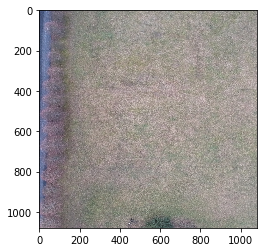

In [327]:
plt.imshow(big_image)

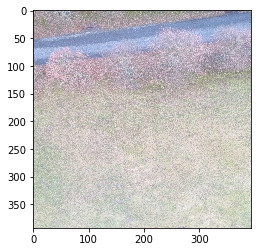

In [328]:
plt.imshow(small_image)

## prepare einvironemnt

## transforms

In [329]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

w,h=small_image.size
print(w,h)
data_transforms_small = transforms.Compose([
    transforms.CenterCrop(w),
    # below are for tests
#     transforms.ColorJitter(brightness=1,contrast=1,saturation=1),
    transforms.ToTensor(),
    normalize
])

data_transforms_big = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

393 393


In [330]:
big_image_transform=data_transforms_big(big_image)
plt.imsave('test/big.png',big_image_transform.numpy()[2])

big_image_transform=big_image_transform.numpy().transpose(1, 2, 0)
big_image_transform=big_image_transform.astype(np.float32)
plt.imsave('test/big2.png',big_image_transform[0])
# big_image_transform


In [331]:
small_images_torch=[]

In [332]:
for rotate_angle in range(0,360,10):
    rotation_45_procent = (rotate_angle%45)/45
    scale=(rotation_45_procent * 0.51)+1
    w,h=small_image.size
    w_scale=int(w*scale)
    h_scale=int(h*scale)
    print(rotate_angle,scale,w_scale,h_scale)
    
    
    small_image_transform=small_image.resize((w_scale,h_scale)).rotate(rotate_angle)
#     small_image_transform=small_image_transform.resize((w,h))
#     small_image_transform=small_image.rotate(rotate_angle)
    small_image_transform.save('test/zzz{}.png'.format(rotate_angle))
    
    small_image_torch = data_transforms_small(small_image_transform)
    
    if rotate_angle%20==0:
        plt.imsave('test/test-{}.png'.format(rotate_angle),small_image_torch.numpy()[0])
        
    
    small_images_torch.append(small_image_torch.unsqueeze(0))

0 1.0 393 393
10 1.1133333333333333 437 437
20 1.2266666666666666 482 482
30 1.3399999999999999 526 526
40 1.4533333333333334 571 571
50 1.0566666666666666 415 415
60 1.17 459 459
70 1.2833333333333332 504 504
80 1.3966666666666667 548 548
90 1.0 393 393
100 1.1133333333333333 437 437
110 1.2266666666666666 482 482
120 1.3399999999999999 526 526
130 1.4533333333333334 571 571
140 1.0566666666666666 415 415
150 1.17 459 459
160 1.2833333333333332 504 504
170 1.3966666666666667 548 548
180 1.0 393 393
190 1.1133333333333333 437 437
200 1.2266666666666666 482 482
210 1.3399999999999999 526 526
220 1.4533333333333334 571 571
230 1.0566666666666666 415 415
240 1.17 459 459
250 1.2833333333333332 504 504
260 1.3966666666666667 548 548
270 1.0 393 393
280 1.1133333333333333 437 437
290 1.2266666666666666 482 482
300 1.3399999999999999 526 526
310 1.4533333333333334 571 571
320 1.0566666666666666 415 415
330 1.17 459 459
340 1.2833333333333332 504 504
350 1.3966666666666667 548 548


In [333]:
print(small_images_torch[10].size())
len(small_images_torch)

torch.Size([1, 3, 393, 393])


36

## cv2 template

In [334]:
max_m=-100
max_loc=None

for torch_image in small_images_torch:
    template_image=torch_image[0].numpy().transpose(1, 2, 0)
    template_image=template_image.astype(np.float32)
    
    w, h = template_image.shape[:-1]
    
    result = cv2.matchTemplate(big_image_transform, template_image, cv2.TM_CCOEFF_NORMED)
  
    if np.amax(result)>max_m:
        max_m=np.amax(result)
        print(max_m,max_loc)
    loc = np.where(result >= max_m)

    for pt in zip(*loc[::-1]): 
        max_loc=pt
        print(max_m,max_loc)
        

print(max_m,max_loc)
cv2.rectangle(big_image_cv2_plis, max_loc, (max_loc[0]+ h, max_loc[1]+ w),(0, 0, 255), 1)


0.17196564 None
0.17196564 (252, 109)
0.18369873 (252, 109)
0.18369873 (114, 57)
0.21548757 (114, 57)
0.21548757 (107, 26)
0.2751833 (107, 26)
0.2751833 (63, 96)
0.30819616 (63, 96)
0.30819616 (71, 2)
0.43289453 (71, 2)
0.43289453 (0, 26)
0.4700441 (0, 26)
0.4700441 (15, 461)
0.4700441 (15, 461)


array([[[117,  84,  70],
        [115,  81,  68],
        [114,  80,  67],
        ...,
        [120, 128, 130],
        [125, 132, 135],
        [122, 129, 132]],

       [[115,  83,  72],
        [113,  80,  68],
        [112,  78,  65],
        ...,
        [139, 146, 149],
        [132, 138, 141],
        [123, 129, 132]],

       [[112,  82,  71],
        [112,  80,  69],
        [112,  80,  67],
        ...,
        [135, 140, 143],
        [132, 137, 140],
        [131, 136, 139]],

       ...,

       [[177, 158, 173],
        [182, 163, 178],
        [188, 171, 185],
        ...,
        [151, 156, 157],
        [156, 161, 162],
        [156, 162, 161]],

       [[171, 152, 167],
        [173, 154, 169],
        [161, 144, 157],
        ...,
        [158, 164, 165],
        [144, 150, 150],
        [160, 166, 166]],

       [[160, 141, 156],
        [153, 134, 149],
        [146, 130, 144],
        ...,
        [154, 162, 162],
        [153, 161, 161],
        [153, 161, 160]]

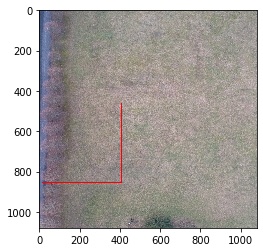

In [335]:
cv2.imwrite('results/finall_image.png', big_image_cv2_plis)
plt.imshow(big_image_cv2_plis[:,:,::-1])

In [336]:
print('end')

end
